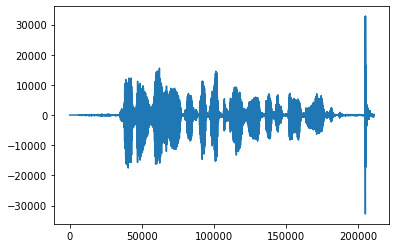

In [1]:
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np

# filter
freq, x = wavfile.read('mono2.wav')

plt.plot(x)



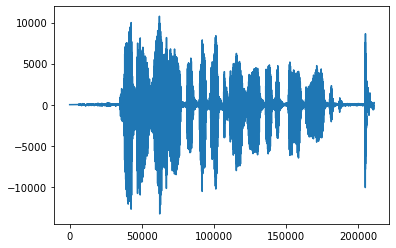

In [2]:
wv = 1000.0 / (freq/2)
b, a = signal.butter(1, wv, 'lowpass')
filtedData = signal.filtfilt(b, a, x, padlen=1)

plt.plot(filtedData)

wavfile.write('output.wav', freq, filtedData.astype(np.int16))


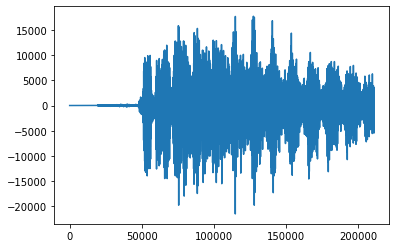

In [3]:
# reverberation
REPEATS = 10
DELAY = int(freq * (10.0 / 335))
DEGAIN = 0.8
DELAY *= 10
input_signal = np.array(x)
output_signal = np.zeros(input_signal.size)
for i in range(0, REPEATS):
    echo_iter = np.concatenate((np.zeros(DELAY * (i + 1)), input_signal))[:input_signal.size]
    echo_iter *= DEGAIN
    DEGAIN -= 0.1

    output_signal += echo_iter.astype(np.int16)

plt.plot(output_signal)

wv = 1000.0 / (freq/2)
b, a = signal.butter(1, wv, 'lowpass')
output_filted = signal.filtfilt(b, a, output_signal, padlen=1)

input_signal += (output_signal * 0.25).astype(np.int16)

wavfile.write('reverb1.wav', freq, input_signal.astype(np.int16))

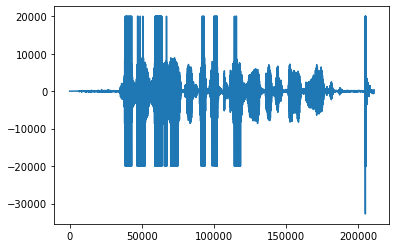

In [4]:
# distortion
input_signal = np.array(x)

threshold = 9000
maximize = 20000

y = []

for i in x:
    if abs(i) > threshold:
        if i > 0:
            y.append(maximize)
        else:
            y.append(maximize * -1)
    else:
        y.append(i)

plt.plot(y)
outfile = np.array(y)
wavfile.write('distort2.wav', freq, outfile.astype(np.int16))